## Model Training
To train a Linear Regression model we need to establish a **Cost Function** which we need to minimize in order to get the most accurate predictions. In our case the Cost Function is such **$C(w, b)$** that minimizes the **$MSE$** of our model.
$$C(w, b)=\frac{1}{2m}\sum_{i=0}^{m}(f(x_{i})-y_{i})^{2} = \frac{1}{2m}\sum_{i=0}^{m}(wx_{i} +b -y_{i})^{2}$$
Division by 2 is an optional step that simplifies latter calculations. In order to minimize the Cost Function we will use the **Gradeint Descent** algorithm which can be written as:
$$w = w - \alpha\frac{\partial C(w, b)}{\partial w}$$
$$b = b - \alpha\frac{\partial C(w, b)}{\partial b}$$
where $\alpha$ is the **Learning Rate**. We repeat these steps until $w$ and $b$ converge.

### Calculating the partial derivatives with respect to $w$ and $b$: ###
$$\frac{\partial C(w, b)}{\partial w} = \frac{1}{m}\sum_{i=0}^{m}(wx_{i}+b-y_{i})\cdot{x}$$
$$\frac{\partial C(w, b)}{\partial b} = \frac{1}{m}\sum_{i=0}^{m}(wx_{i}+b-y_{i})$$

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import typing

In [70]:
class SimpleLinearReg:
    def __init__(self):
        self.R_squared = 0.0
        self.MSE = 0.0
    
    def cost_func(self, X: np.ndarray, y: np.ndarray, w: float, b: float):
        m = X.shape[0]
        f = w * X + b
        
        return np.sum((f-y)**2 / (2*m))

    def get_gradient(self, X: np.ndarray, y: np.ndarray, w: float, b: float):  
        m = X.shape[0]
        error = w * X + b - y

        dc_dW = np.sum(error * X) / m
        dc_dB = np.sum(error) / m

        return dc_dW, dc_dB

    def gradient_descent(self, X: np.ndarray, y: np.ndarray, alpha: float, iterations: int):
        w = 0
        b = 0

        prev_cost = np.inf

        for i in range(iterations):
            dc_dW, dc_dB = self.get_gradient(X, y, w, b)
            w -= alpha * dc_dW
            b -= alpha * dc_dB

            cost  = self.cost_func(X, y, w, b)

            if np.abs(cost-prev_cost) < 1e-7:
                break
            prev_cost = cost
    
        return w, b
    
    def fit(self, X_train: np.ndarray, y_train: np.ndarray):

        if type(X_train) is not np.ndarray:  
            raise TypeError('X_train param must be of type: np.ndarry!')
        if type(y_train) is not np.ndarray:  
            raise TypeError('y_train param must be of type: np.ndarry!')
        
        self.coeffs = self.gradient_descent(X_train, y_train, alpha=0.00001, iterations=10000)
        

    def predict(self, X_test: np.ndarray):
        w, b = self.coeffs     
        return X_test * w + b

    def score(self, X_test, y_test):
        y_pred = self.predict(X_test) 
        self.MSE = np.mean((y_test- y_pred)**2)
        return self.MSE


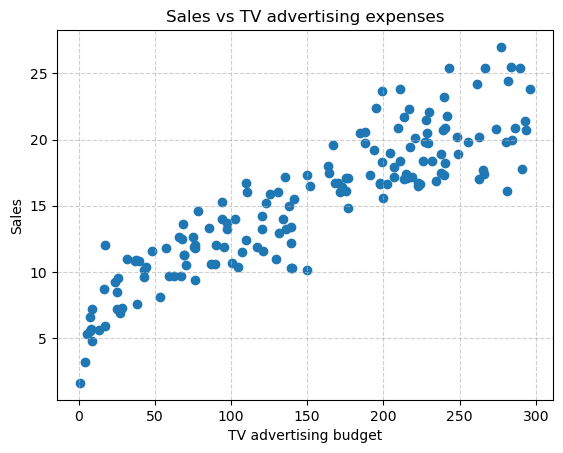

In [67]:
from sklearn.model_selection import train_test_split

ads = pd.read_csv('../Data/ads/advertising.csv')
ads.head()

X = ads['TV'].values
y = ads['Sales'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

plt.scatter(X_train, y_train)
plt.xlabel('TV advertising budget')
plt.ylabel('Sales')
plt.title('Sales vs TV advertising expenses')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

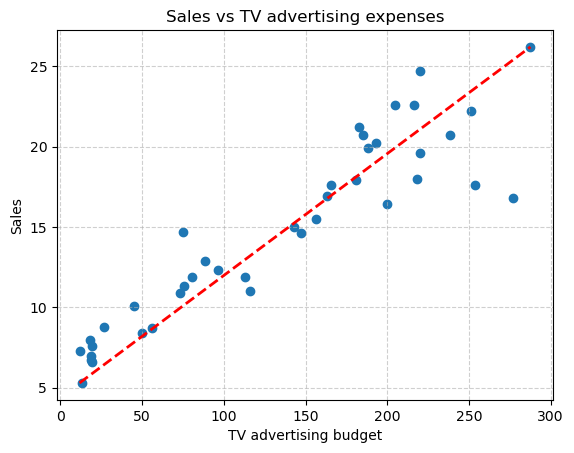

In [71]:
LinReg = SimpleLinearReg()

LinReg.fit(X_train, y_train)
y_pred = LinReg.predict(X_test)
w,b = LinReg.coeffs

plt.plot([X_test.min(), X_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.scatter(X_test, y_test)
plt.xlabel('TV advertising budget')
plt.ylabel('Sales')
plt.title('Sales vs TV advertising expenses')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [72]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train.reshape(-1,1), y_train)
y_pred_2 = reg.predict(X_test.reshape(-1,1))

print(f'My linear regression coefs: {LinReg.coeffs}')
print(f'SKLearn linear regression coefs: {reg.coef_[0]}, {reg.intercept_}')

My linear regression coefs: (np.float64(0.0887827243043046), np.float64(0.17159075879684105))
SKLearn linear regression coefs: 0.054049034670669106, 7.094404759150411
